<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Flow intro

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TF DATA/fake_reg.csv')

In [ ]:
df.head(3)

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015


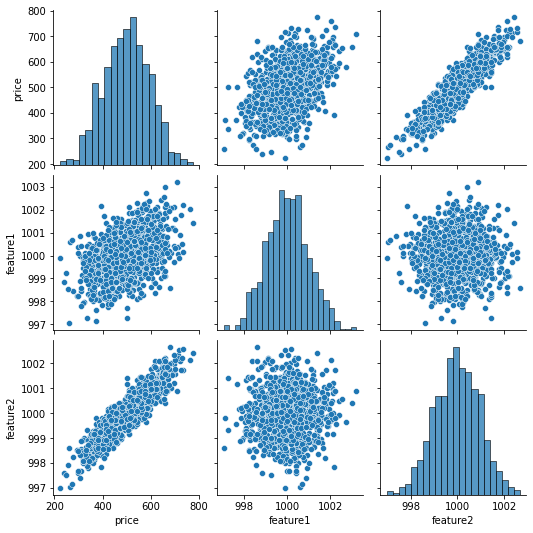

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['feature1','feature2']].values

In [ ]:
y = df[['price']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop',loss='mse')

In [ ]:
model.fit(X_train,y_train,epochs=250,verbose=1)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256709.0312
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256667.6406
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256616.8281
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256561.4688
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256500.2969
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 256432.5781
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256358.1250
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256276.3125
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256186.8750
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 256088.6875
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255978.9688
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [ ]:
history = pd.DataFrame(model.history.history)

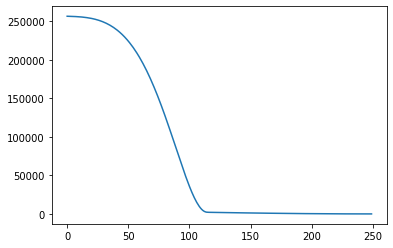

In [ ]:
plt.plot(history)

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

29.329971313476562

In [ ]:
model.evaluate(X_train,y_train,verbose=0)

28.556669235229492

In [ ]:
test_predict = model.predict(X_test)

In [ ]:
test_predict = pd.Series(test_predict.reshape(300,))

In [ ]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [ ]:
pred_df = pd.concat([pred_df, test_predict],axis=1)

In [ ]:
pred_df.columns = ['test true y', 'model']

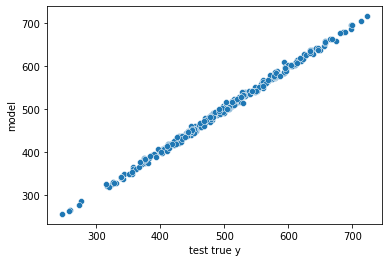

In [ ]:
sns.scatterplot(data=pred_df, x= 'test true y', y='model')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(pred_df['test true y'], pred_df['model'])

4.423302421743597

In [ ]:
mean_squared_error(pred_df['test true y'], pred_df['model'])

29.329977451396445

In [ ]:
new_gem=[[998,1000]]

In [ ]:
new_gem = scaler.transform(new_gem)

In [ ]:
model.predict(new_gem)

array([[422.9119]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_gem_model.h5')

#Tensor Flow regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TF DATA/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

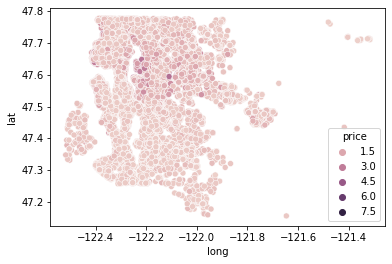

In [ ]:
sns.scatterplot(data= df, x='long', y='lat', hue='price')

In [ ]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
len(df)*0.01

215.97

In [ ]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

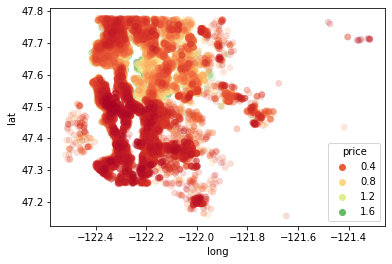

In [ ]:
sns.scatterplot(data= non_top_1_perc, x='long', y='lat', hue='price', edgecolor=None, alpha =0.2,palette='RdYlGn')

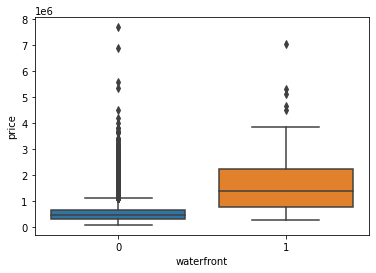

In [ ]:
sns.boxplot(x='waterfront', y='price', data=df)

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].apply(lambda x:x.year)
df['month'] = df['date'].apply(lambda x:x.month)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


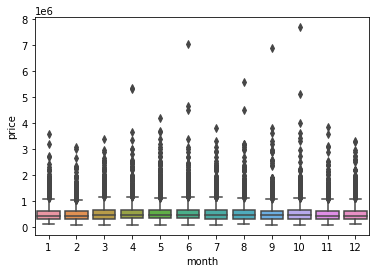

In [ ]:
sns.boxplot(data=df, x='month', y='price')

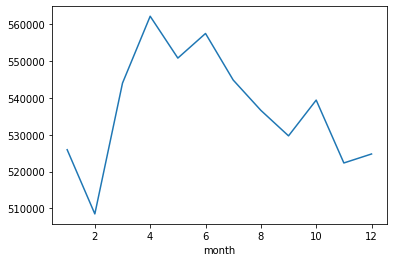

In [ ]:
df.groupby('month').mean()['price'].plot()

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
df = df.drop('yr_renovated',axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,month
yr_renovated,,,,,,,,,,,,,,,,,,,
0,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683,20683
1934,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1940,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1944,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1945,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2012,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2013,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


In [ ]:
df.pivot_table(index='month', columns='year', values='price', aggfunc='mean')

year,2014,2015
month,,
1,NaN,525963.251534
2,NaN,508520.051323
3,NaN,544057.683200
4,NaN,562215.615074
5,548166.600113,558193.095975
6,557534.318182,NaN
7,544892.161013,NaN
8,536655.212481,NaN
9,529723.517787,NaN


In [ ]:
X =df.drop('price', axis=1).values
y=df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense
X_train.shape

(15117, 19)

In [ ]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss='mse')

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          batch_size=100, 
          epochs=500,
          verbose=1)

Epoch 1/500
152/152 [==============================] - 2s 7ms/step - loss: 430181613568.0000 - val_loss: 418525380608.0000
Epoch 2/500
152/152 [==============================] - 1s 5ms/step - loss: 423225425920.0000 - val_loss: 394616569856.0000
Epoch 3/500
152/152 [==============================] - 1s 5ms/step - loss: 337062952960.0000 - val_loss: 223468306432.0000
Epoch 4/500
152/152 [==============================] - 1s 5ms/step - loss: 141690814464.0000 - val_loss: 96502521856.0000
Epoch 5/500
152/152 [==============================] - 1s 5ms/step - loss: 98195529728.0000 - val_loss: 93705953280.0000
Epoch 6/500
152/152 [==============================] - 1s 4ms/step - loss: 95612010496.0000 - val_loss: 91365933056.0000
Epoch 7/500
152/152 [==============================] - 0s 3ms/step - loss: 93121110016.0000 - val_loss: 89002754048.0000
Epoch 8/500
152/152 [==============================] - 0s 3ms/step - loss: 90542579712.0000 - val_loss: 86488219648.0000
Epoch 9/500
152/152 [====

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

24977097197.869286

In [ ]:
mean_absolute_error(y_test,y_pred)

99027.38595679012

In [ ]:
explained_variance_score(y_test,y_pred)

0.8117084049016844

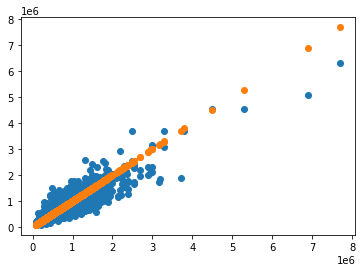

In [ ]:
plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_test)

In [ ]:
df['price'].iloc[0]

221900.0

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
model.predict(single_house)

array([[284176.38]], dtype=float32)

# TF Classification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TF DATA/cancer_classification.csv')

In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

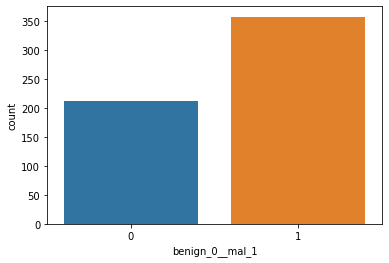

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

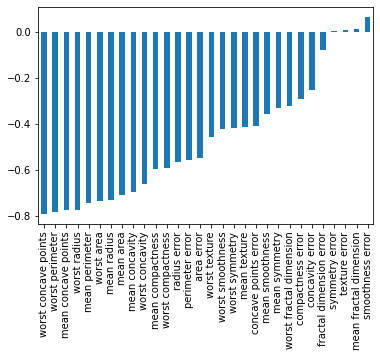

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values

In [ ]:
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential()
model.add(Dense(30,activation ='relu'))
model.add(Dense(15,activation ='relu'))
model.add(Dense(1,activation ='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 24ms/step - loss: 0.6788 - val_loss: 0.6584
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6479 - val_loss: 0.6329
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6199 - val_loss: 0.6028
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5868 - val_loss: 0.5647
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5481 - val_loss: 0.5218
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5061 - val_loss: 0.4768
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4619 - val_loss: 0.4285
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4150 - val_loss: 0.3794
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3724 - val_loss: 0.3368
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3353 - val_loss: 0.3036
Epoch 11

In [ ]:
history = pd.DataFrame(model.history.history)

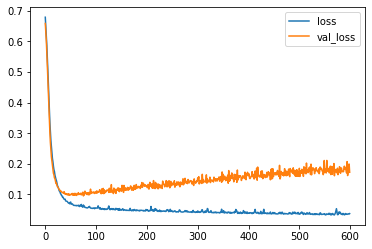

In [ ]:
history.plot()

In [ ]:
model = Sequential()
model.add(Dense(30,activation ='relu'))
model.add(Dense(15,activation ='relu'))
model.add(Dense(1,activation ='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

In [ ]:
history = pd.DataFrame(model.history.history)

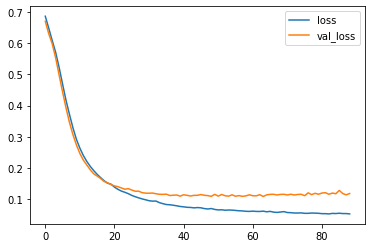

In [ ]:
history.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(30,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation ='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 30ms/step - loss: 0.6821 - val_loss: 0.6755
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6693 - val_loss: 0.6558
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6382 - val_loss: 0.6344
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6266 - val_loss: 0.6123
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6093 - val_loss: 0.5878
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5748 - val_loss: 0.5634
Epoch 7/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5625 - val_loss: 0.5306
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5458 - val_loss: 0.5006
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5194 - val_loss: 0.4745
Epoch 10/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5059 - val_loss: 0.4621
Epoch 

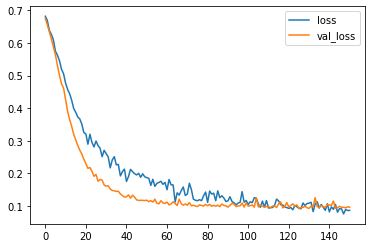

In [ ]:
history = pd.DataFrame(model.history.history)
history.plot()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[53  2]
 [ 1 87]]


# Tensor Flow

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [132]:
df= pd.read_csv('/content/drive/MyDrive/TF DATA/lending_club_loan_two.csv')

In [133]:
for i in df.columns:
    print(i,':',df[i].nunique())

loan_amnt : 1397
term : 2
int_rate : 566
installment : 55706
grade : 7
sub_grade : 35
emp_title : 173105
emp_length : 11
home_ownership : 6
annual_inc : 27197
verification_status : 3
issue_d : 115
loan_status : 2
purpose : 14
title : 48817
dti : 4262
earliest_cr_line : 684
open_acc : 61
pub_rec : 20
revol_bal : 55622
revol_util : 1226
total_acc : 118
initial_list_status : 2
application_type : 3
mort_acc : 33
pub_rec_bankruptcies : 9
address : 393700


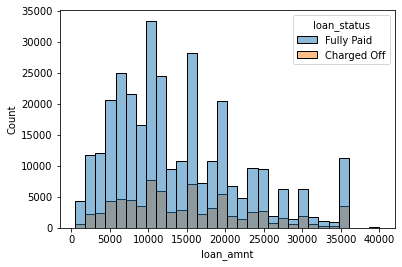

In [134]:
sns.histplot(data=df,x='loan_amnt', hue='loan_status', bins=30)

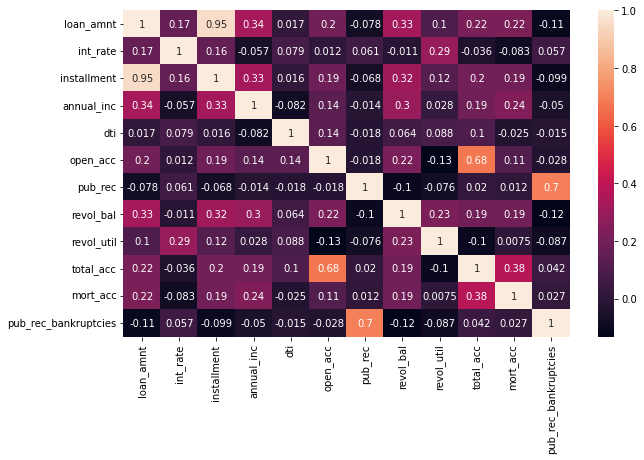

In [135]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

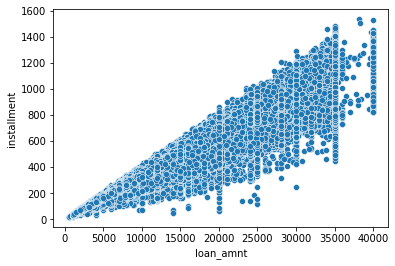

In [136]:
sns.scatterplot(data=df, x='loan_amnt', y='installment')

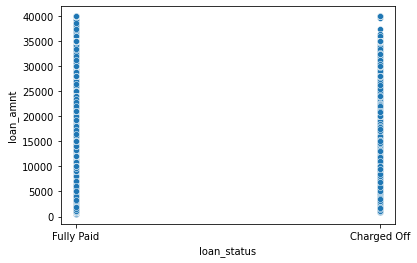

In [137]:
sns.scatterplot(x='loan_status', y='loan_amnt', data=df)

In [138]:
df.groupby('grade')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,64187.0,13294.734526,7376.005559,725.0,7500.0,12000.0,18450.0,40000.0
B,116018.0,12895.710795,7393.687894,500.0,7375.0,11200.0,17000.0,40000.0
C,105987.0,13761.337004,8421.998481,500.0,7375.0,12000.0,19000.0,40000.0
D,63524.0,14695.402919,8972.220921,1000.0,7900.0,12775.0,20000.0,40000.0
E,31488.0,17723.595497,9468.414168,1000.0,10150.0,16450.0,25000.0,40000.0
F,11772.0,19211.506116,9349.866049,1000.0,12000.0,19000.0,26000.0,40000.0
G,3054.0,20879.952521,8830.188236,1000.0,13850.0,20000.0,28000.0,36000.0


In [139]:
df.groupby('grade')['loan_status'].value_counts()

grade  loan_status
A      Fully Paid      60151
       Charged Off      4036
B      Fully Paid     101431
       Charged Off     14587
C      Fully Paid      83538
       Charged Off     22449
D      Fully Paid      45186
       Charged Off     18338
E      Fully Paid      19723
       Charged Off     11765
F      Fully Paid       6735
       Charged Off      5037
G      Fully Paid       1593
       Charged Off      1461
Name: loan_status, dtype: int64

In [140]:
order = df['sub_grade'].unique()
order.sort()

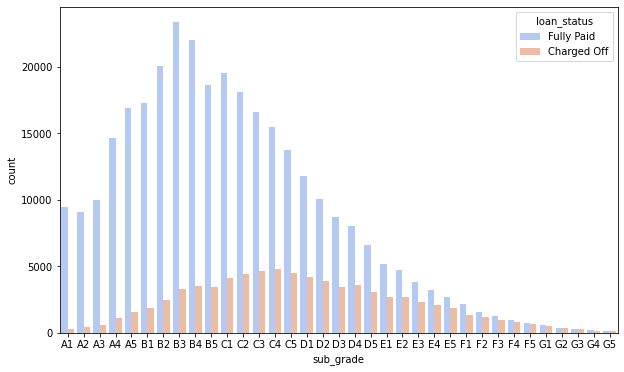

In [141]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x='sub_grade',
              hue='loan_status',
              order=sorted(df['sub_grade'].unique()),
              palette='coolwarm')


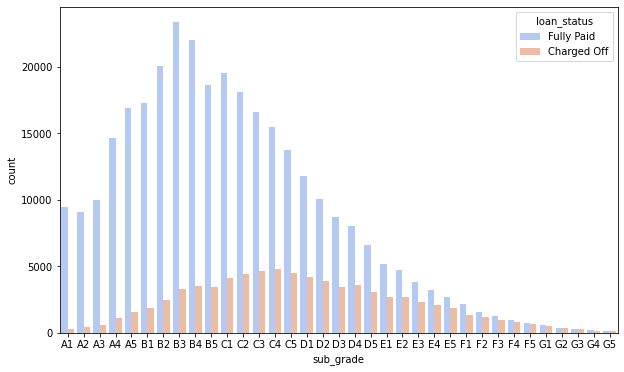

In [142]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x='sub_grade',
              hue='loan_status',
              order=order,
              palette='coolwarm')

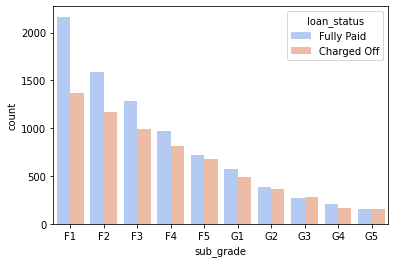

In [143]:
f_G = df[(df['grade'] =='G') | (df['grade'] =='F')]
order = f_G ['sub_grade'].unique()
order.sort()

sns.countplot(data=f_G,
              x='sub_grade',
              hue='loan_status',
              order=order,
              palette='coolwarm')

In [144]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [145]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

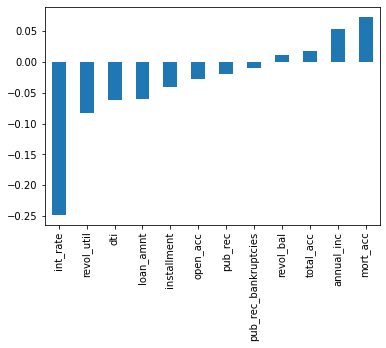

In [146]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [147]:
len(df)

396030

In [148]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [149]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [150]:
df = df.drop('emp_title',axis=1)

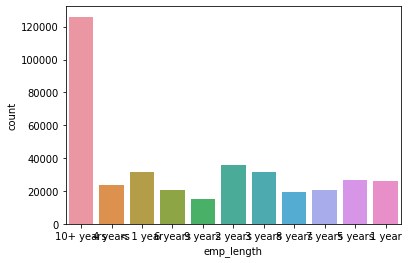

In [151]:
plt.tight_layout()
sns.countplot(data=df, x='emp_length')

In [152]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [153]:
emp_length_order = ['< 1 year',
'1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',]

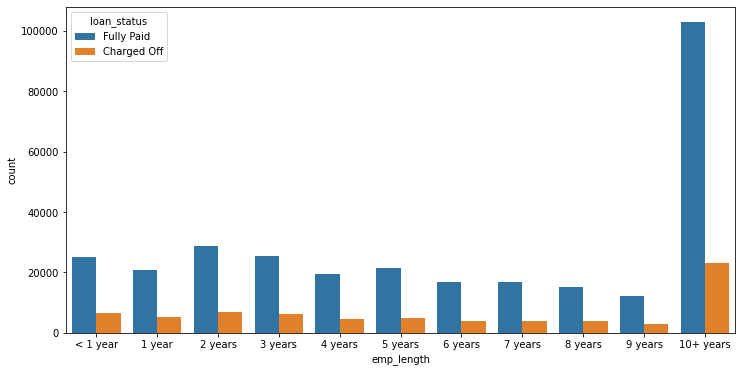

In [154]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='emp_length', order = emp_length_order ,hue='loan_status')

In [155]:
df.groupby('emp_length')['loan_amnt'].count()

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_amnt, dtype: int64

In [156]:
df[df['loan_status'] == 'Charged Off'].groupby('emp_length')['loan_amnt'].count() / df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_amnt'].count()

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_amnt, dtype: float64

In [157]:
df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_amnt'].count()

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_amnt, dtype: int64

In [158]:
df.pivot_table(index='loan_status',columns='emp_length', values='loan_amnt',aggfunc='count')

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,5154,23215,6924,6182,4608,5092,3943,4055,3829,3070,6563
Fully Paid,20728,102826,28903,25483,19344,21403,16898,16764,15339,12244,25162


In [159]:
df = df.drop('emp_length', axis=1)

In [160]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [161]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [162]:
df = df.drop('title',axis=1)

In [163]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [164]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [165]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

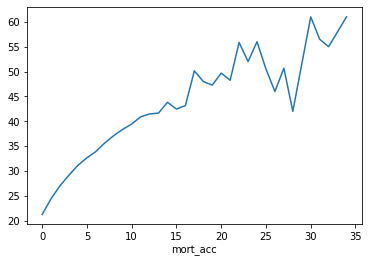

In [166]:
df.groupby('mort_acc').mean()['total_acc'].plot()

In [167]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


In [168]:
def fillin(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return  total_acc_avg[total_acc]
    else:
        return mort_acc
df['mort_acc']=df.apply(lambda x: fillin(x['total_acc'],x['mort_acc']),axis=1)

In [169]:
df[pd.isnull(df['mort_acc'])][['mort_acc','total_acc']]

,mort_acc,total_acc


In [170]:
df.corr()['revol_util']

loan_amnt               0.099911
int_rate                0.293659
installment             0.123915
annual_inc              0.027871
dti                     0.088375
open_acc               -0.131420
pub_rec                -0.075910
revol_bal               0.226346
revol_util              1.000000
total_acc              -0.104273
mort_acc               -0.104273
pub_rec_bankruptcies   -0.086751
loan_repaid            -0.082373
Name: revol_util, dtype: float64

In [171]:
df = df.dropna()

In [172]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [173]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [174]:
df['term'] = df['term'].apply(lambda x:int(x.split()[0]))

In [176]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [177]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [178]:
df = df.drop('grade', axis=1)

In [179]:
df['sub_grade']

0         B4
1         B5
2         B3
3         A2
4         C5
          ..
396025    B4
396026    C1
396027    B1
396028    C2
396029    C2
Name: sub_grade, Length: 395219, dtype: object

In [185]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [186]:
dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
df = pd.concat([df,dummies],axis=1)

In [195]:
df= df.drop('sub_grade',axis=1)

In [197]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [199]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [200]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [201]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [202]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [203]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [206]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [209]:
df['zip_code'] = df['address'].apply(lambda x:x[-5:])

In [212]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [213]:
df = df.drop('address', axis=1)

In [215]:
df = df.drop('issue_d',axis=1)

In [220]:
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x:int(x.split('-')[1]))

In [222]:
df['earliest_cr_line_year'].unique()

array([1990, 2004, 2007, 2006, 1999, 2005, 1994, 1997, 1984, 1995, 2001,
       1982, 1996, 2000, 2003, 2008, 1998, 2002, 2009, 1992, 1988, 2010,
       1986, 2012, 1978, 1993, 1983, 1989, 1991, 2011, 1980, 1981, 1987,
       1985, 1967, 1972, 1969, 1979, 1965, 1977, 1974, 1976, 1975, 1971,
       2013, 1964, 1970, 1973, 1963, 1960, 1966, 1961, 1968, 1958, 1955,
       1953, 1959, 1962, 1944, 1956, 1951, 1957, 1950, 1954, 1948])

In [224]:
df = df.drop('earliest_cr_line',axis=1)